<a href="https://colab.research.google.com/github/tjddyd2259/caba_nlp/blob/main/DL30_overfitting_and_underfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import imdb
import numpy as np

(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [2]:
train_data.shape
len(train_data[0])
train_data[:5]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [3]:
def vectorize_sequences(sequences,dimension=10000):
  results = np.zeros((len(sequences),dimension))
  for i, sequence in enumerate(sequences):
    results[i,sequence]=1. 
  return results


In [4]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [5]:
# 네트워크 크기 축소
from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
original_model.add(layers.Dense(16,activation='relu'))
original_model.add(layers.Dense(1,activation='sigmoid'))
original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

In [6]:
# 더 작은 네트워크

smaller_model = models.Sequential()
smaller_model.add(layers.Dense(6,activation='relu',input_shape=(10000,)))
smaller_model.add(layers.Dense(6,activation='relu'))
smaller_model.add(layers.Dense(1,activation='sigmoid'))
smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

In [7]:
original_hist = original_model.fit(x_train,y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test,y_test))

Epoch 1/20
49/49 [==============================] - 5s 36ms/step - loss: 0.5511 - acc: 0.7448 - val_loss: 0.3377 - val_acc: 0.8792
Epoch 2/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2767 - acc: 0.9063 - val_loss: 0.2859 - val_acc: 0.8881
Epoch 3/20
49/49 [==============================] - 1s 22ms/step - loss: 0.1974 - acc: 0.9314 - val_loss: 0.2796 - val_acc: 0.8875
Epoch 4/20
49/49 [==============================] - 1s 22ms/step - loss: 0.1596 - acc: 0.9437 - val_loss: 0.3082 - val_acc: 0.8786
Epoch 5/20
49/49 [==============================] - 1s 22ms/step - loss: 0.1380 - acc: 0.9538 - val_loss: 0.3116 - val_acc: 0.8798
Epoch 6/20
49/49 [==============================] - 1s 23ms/step - loss: 0.1229 - acc: 0.9589 - val_loss: 0.3424 - val_acc: 0.8754
Epoch 7/20
49/49 [==============================] - 1s 22ms/step - loss: 0.1029 - acc: 0.9667 - val_loss: 0.3667 - val_acc: 0.8699
Epoch 8/20
49/49 [==============================] - 1s 21ms/step - loss: 0.0903 - a

In [ ]:
smaller_model_hist = smaller_model.fit(x_train,y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test,y_test))

Epoch 1/20
49/49 [==============================] - 4s 65ms/step - loss: 0.5725 - acc: 0.7398 - val_loss: 0.3954 - val_acc: 0.8710
Epoch 2/20
49/49 [==============================] - 1s 22ms/step - loss: 0.3317 - acc: 0.9006 - val_loss: 0.3189 - val_acc: 0.8830
Epoch 3/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2484 - acc: 0.9221 - val_loss: 0.2894 - val_acc: 0.8901
Epoch 4/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2036 - acc: 0.9351 - val_loss: 0.2827 - val_acc: 0.8878
Epoch 5/20
49/49 [==============================] - 1s 21ms/step - loss: 0.1757 - acc: 0.9422 - val_loss: 0.2858 - val_acc: 0.8858
Epoch 6/20
49/49 [==============================] - 1s 21ms/step - loss: 0.1560 - acc: 0.9499 - val_loss: 0.2892 - val_acc: 0.8844
Epoch 7/20
49/49 [==============================] - 1s 22ms/step - loss: 0.1413 - acc: 0.9565 - val_loss: 0.3015 - val_acc: 0.8811
Epoch 8/20
49/49 [==============================] - 1s 22ms/step - loss: 0.1291 - a

In [14]:
epochs = range(1,21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

NameError: ignored

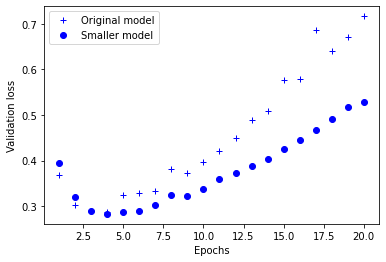

In [ ]:
import matplotlib.pyplot as plt
plt.plot(epochs,original_val_loss,'b+',label='Original model')
plt.plot(epochs,smaller_model_val_loss,'bo',label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.show()

In [ ]:
# 더 큰 네트워크

bigger_model = models.Sequential()
bigger_model.add(layers.Dense(1024,activation='relu',input_shape=(10000,)))
bigger_model.add(layers.Dense(1024,activation='relu'))
bigger_model.add(layers.Dense(1,activation='sigmoid'))
bigger_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])
bigger_model_hist = bigger_model.fit(x_train,y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test,y_test))

Epoch 1/20
49/49 [==============================] - 5s 44ms/step - loss: 0.7955 - acc: 0.6878 - val_loss: 0.3088 - val_acc: 0.8677
Epoch 2/20
49/49 [==============================] - 1s 29ms/step - loss: 0.2278 - acc: 0.9104 - val_loss: 0.2758 - val_acc: 0.8878
Epoch 3/20
49/49 [==============================] - 1s 30ms/step - loss: 0.1032 - acc: 0.9633 - val_loss: 0.3298 - val_acc: 0.8870
Epoch 4/20
49/49 [==============================] - 1s 29ms/step - loss: 0.0616 - acc: 0.9873 - val_loss: 0.4453 - val_acc: 0.8826
Epoch 5/20
49/49 [==============================] - 1s 29ms/step - loss: 0.0115 - acc: 0.9985 - val_loss: 0.3798 - val_acc: 0.8810
Epoch 6/20
49/49 [==============================] - 1s 29ms/step - loss: 0.0029 - acc: 0.9999 - val_loss: 0.6431 - val_acc: 0.8838
Epoch 7/20
49/49 [==============================] - 1s 29ms/step - loss: 1.0270e-04 - acc: 1.0000 - val_loss: 0.8448 - val_acc: 0.8770
Epoch 8/20
49/49 [==============================] - 1s 29ms/step - loss: 0.0681

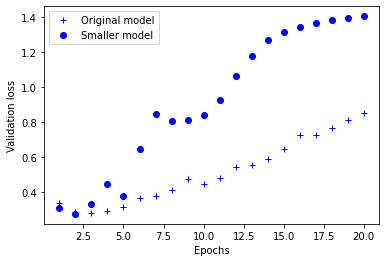

In [ ]:
epochs = range(1,21)
original_val_loss = original_hist.history['val_loss']
bigger_model_val_loss = bigger_model_hist.history['val_loss']

import matplotlib.pyplot as plt
plt.plot(epochs,original_val_loss,'b+',label='Original model')
plt.plot(epochs,bigger_model_val_loss,'bo',label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.show()

용량이 큰 네트워크는 첫번째 에포크 이후 바로 과대적합이 시작되어 갈수록 심해진다.

가중치 규제 추가
- L1 규제 : 가중치의 절대값이 비례하는 비용이 추가 ( 가중치의 L1 노름)
- L2 규제 : 가중치의 제곱에 비례하는 비용이 추가 ( 가중치의 L2 노름) - 가중치 감쇠라고도 함 

In [8]:
from keras import regularizers

l2_model =models.Sequential()
l2_model.add(layers.Dense(16,kernel_regularizer=regularizers.l2(0.001),
                          activation='relu',input_shape=(10000,)))
l2_model.add(layers.Dense(16,kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1,activation='sigmoid'))

l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [9]:
l2_model_hist = l2_model.fit(x_train,y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test,y_test))

Epoch 1/20
49/49 [==============================] - 2s 34ms/step - loss: 0.5919 - acc: 0.7283 - val_loss: 0.3772 - val_acc: 0.8804
Epoch 2/20
49/49 [==============================] - 1s 22ms/step - loss: 0.3206 - acc: 0.9106 - val_loss: 0.3614 - val_acc: 0.8716
Epoch 3/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2639 - acc: 0.9234 - val_loss: 0.3324 - val_acc: 0.8870
Epoch 4/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2419 - acc: 0.9315 - val_loss: 0.3379 - val_acc: 0.8831
Epoch 5/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2273 - acc: 0.9367 - val_loss: 0.3410 - val_acc: 0.8840
Epoch 6/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2118 - acc: 0.9470 - val_loss: 0.3645 - val_acc: 0.8764
Epoch 7/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2030 - acc: 0.9483 - val_loss: 0.3796 - val_acc: 0.8724
Epoch 8/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2055 - a

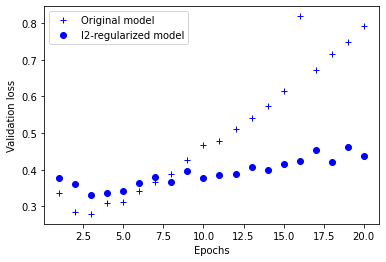

In [15]:
import matplotlib.pyplot as plt
epochs = range(1,21)
l2_model_val_loss = l2_model_hist.history['val_loss']
original_val_loss = original_hist.history['val_loss']
plt.plot(epochs,original_val_loss,'b+',label='Original model')
plt.plot(epochs,l2_model_val_loss,'bo',label='l2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.show()

두 모델이 동일한 파라미터 수를 가지고 있더라고 L2 규제를 사용한 모델이 기본 모델보다 훨씬 더 과대적합에 잘 견디고 있다.

In [ ]:
l1(0.0001) 모델과 비교


In [ ]:
l1_l2(l1=0.0001,l2=0.0001) 모델과 비교 

# 드롭아웃 추가
layer_output += np.random.randint(0,high=2,size=layer_output.shape)

In [16]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16,activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1,activation='sigmoid'))

In [17]:
dpt_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

dpt_model_hist = dpt_model.fit(x_train,y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test,y_test))

Epoch 1/20
49/49 [==============================] - 2s 30ms/step - loss: 0.6192 - acc: 0.6571 - val_loss: 0.4066 - val_acc: 0.8751
Epoch 2/20
49/49 [==============================] - 1s 22ms/step - loss: 0.4229 - acc: 0.8314 - val_loss: 0.3202 - val_acc: 0.8818
Epoch 3/20
49/49 [==============================] - 1s 22ms/step - loss: 0.3366 - acc: 0.8795 - val_loss: 0.2860 - val_acc: 0.8896
Epoch 4/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2827 - acc: 0.9034 - val_loss: 0.2830 - val_acc: 0.8871
Epoch 5/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2485 - acc: 0.9164 - val_loss: 0.2806 - val_acc: 0.8904
Epoch 6/20
49/49 [==============================] - 1s 21ms/step - loss: 0.2177 - acc: 0.9277 - val_loss: 0.3058 - val_acc: 0.8833
Epoch 7/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2067 - acc: 0.9315 - val_loss: 0.3041 - val_acc: 0.8869
Epoch 8/20
49/49 [==============================] - 1s 22ms/step - loss: 0.1907 - a

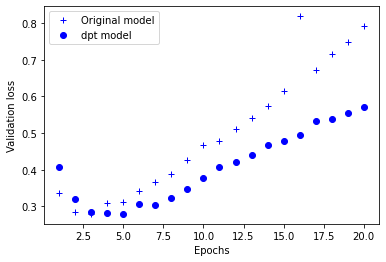

In [19]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']
original_val_loss = original_hist.history['val_loss']
plt.plot(epochs,original_val_loss,'b+',label='Original model')
plt.plot(epochs,dpt_model_val_loss,'bo',label='dpt model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.show()